Aerodynamic Coefficients (sin²/sin⁴ model):
Cd0 (zero-lift drag) = 0.256005
Cd2 (quadratic term) = -0.106935
Cd4 (quartic term) = 0.422151


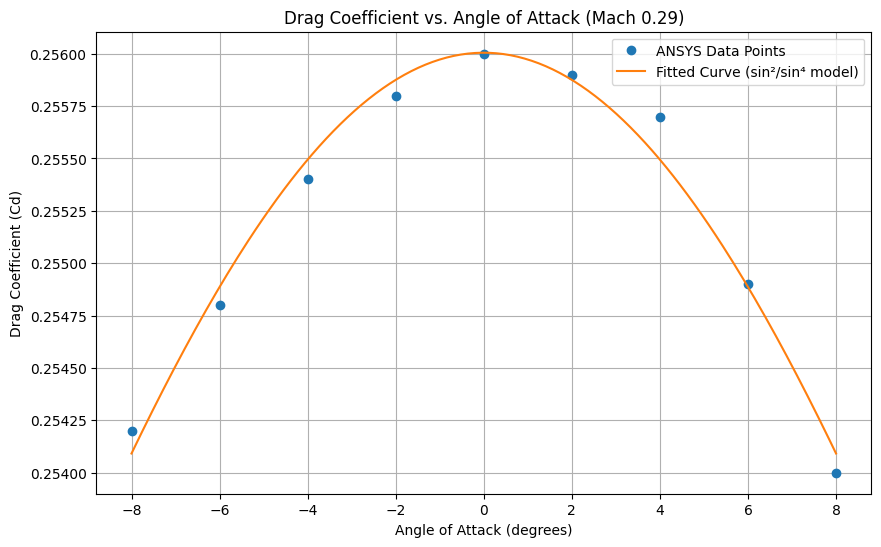

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data set
alpha_deg = np.array([-8,-6,-4,-2,0,2,4,6,8])
cd = np.array([0.2542,0.2548,0.2554,0.2558,0.2560,0.2559,0.2557,0.2549,0.2540])

# Convert to radians
alpha_rad = np.deg2rad(alpha_deg)

# Features for sin² and sin⁴
X = np.column_stack([np.sin(alpha_rad)**2, np.sin(alpha_rad)**4])

# Fit regression model
lr = LinearRegression().fit(X, cd)
cd_fit = lr.predict(X)

# Extract coefficients
Cd0 = lr.intercept_
Cd2, Cd4 = lr.coef_

# Print coefficients
print("Aerodynamic Coefficients (sin²/sin⁴ model):")
print(f"Cd0 (zero-lift drag) = {Cd0:.6f}")
print(f"Cd2 (quadratic term) = {Cd2:.6f}")
print(f"Cd4 (quartic term) = {Cd4:.6f}")

# Smooth curve for plotting
alpha_deg_smooth = np.linspace(-8, 8, 200)
alpha_rad_smooth = np.deg2rad(alpha_deg_smooth)
X_smooth = np.column_stack([np.sin(alpha_rad_smooth)**2, np.sin(alpha_rad_smooth)**4])
cd_smooth = lr.predict(X_smooth)

# Plot
plt.figure(figsize=(10,6))
plt.plot(alpha_deg, cd, 'o', label='ANSYS Data Points')
plt.plot(alpha_deg_smooth, cd_smooth, '-', label='Fitted Curve (sin²/sin⁴ model)')
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Drag Coefficient (Cd)")
plt.title("Drag Coefficient vs. Angle of Attack (Mach 0.29)")
plt.grid(True)
plt.legend()
plt.show()


--- Calculated Aerodynamic Coefficients from Full Dataset ---
Cl1 (linear term): -1.063806
Cl3 (cubic term): -4.774683
Cl5 (quintic term): 180.800752

--- Even Coefficients (ideally ~0 for odd symmetry) ---
Coefficient for sin^4: -5.295657e+00
Coefficient for sin^2: 2.550447e-01
Constant offset: 4.549743e-03
---------------------------------------------------------


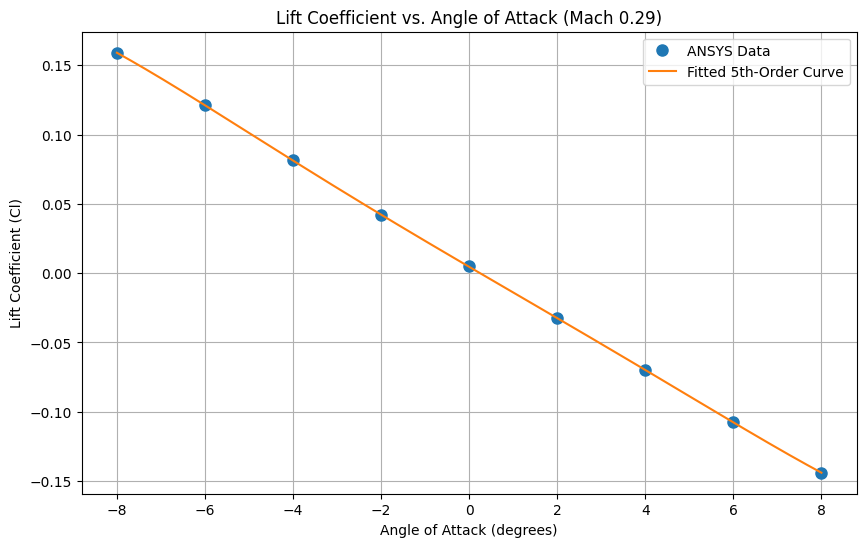

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ANSYS dataset (Cl vs AoA)
alpha_deg = np.array([-8,-6,-4,-2,0,2,4,6,8])
cl = np.array([0.1590,0.1210,0.0815,0.0417,0.0049,-0.0325,-0.0700,-0.1076,-0.1440])

# Convert angles to radians
alpha_rad = np.deg2rad(alpha_deg)
x_fit = np.sin(alpha_rad) # fitting in terms of sin(alpha)

# Perform 5th-order polynomial fit
coeffs = np.polyfit(x_fit, cl, 5)
C_l5, B, C_l3, D, C_l1, F = coeffs

# Print results
print("--- Calculated Aerodynamic Coefficients from Full Dataset ---")
print(f"Cl1 (linear term): {C_l1:.6f}")
print(f"Cl3 (cubic term): {C_l3:.6f}")
print(f"Cl5 (quintic term): {C_l5:.6f}")
print("\n--- Even Coefficients (ideally ~0 for odd symmetry) ---")
print(f"Coefficient for sin^4: {B:.6e}")
print(f"Coefficient for sin^2: {D:.6e}")
print(f"Constant offset: {F:.6e}")
print("---------------------------------------------------------")

# Smooth fit curve
alpha_deg_smooth = np.linspace(min(alpha_deg), max(alpha_deg), 200)
alpha_rad_smooth = np.deg2rad(alpha_deg_smooth)
cl_fit_smooth = np.polyval(coeffs, np.sin(alpha_rad_smooth)) # FIXED

# Plot
plt.figure(figsize=(10, 6))
plt.plot(alpha_deg, cl, 'o', markersize=8, label='ANSYS Data')
plt.plot(alpha_deg_smooth, cl_fit_smooth, '-', label='Fitted 5th-Order Curve')
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Lift Coefficient (Cl)")
plt.title("Lift Coefficient vs. Angle of Attack (Mach 0.29)")
plt.grid(True)
plt.legend()
plt.show()


Cm1 (linear/odd term): -0.557825
Cm3 (cubic/odd term): 7.320966


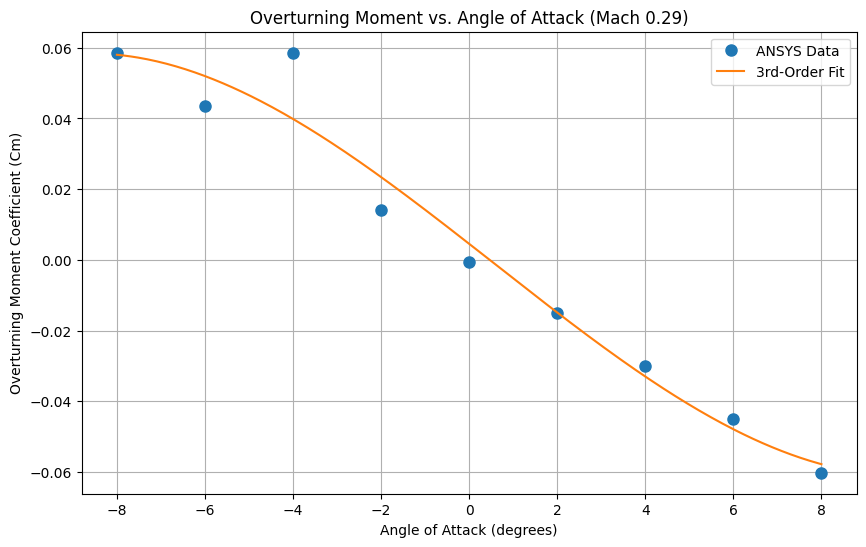

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Input your FULL SYMMETRIC ANSYS dataset
alpha_deg = np.array([-8,-6,-4,-2,0,2,4,6,8])
cm = np.array([0.0586,0.0436,0.0586,0.0141,-0.0005,-0.0151,-0.0299,-0.0449,-0.0602])

# Convert angles to radians
alpha_rad = np.deg2rad(alpha_deg)
x_fit = np.sin(alpha_rad)

# Perform 3rd-order polynomial fit
coeffs = np.polyfit(x_fit, cm, 3)
C_m3, _, C_m1, _ = coeffs # Only keep Cm3 and Cm1

# Print Cm1 and Cm3
print(f"Cm1 (linear/odd term): {C_m1:.6f}")
print(f"Cm3 (cubic/odd term): {C_m3:.6f}")

# Smooth curve for plotting
alpha_deg_smooth = np.linspace(min(alpha_deg), max(alpha_deg), 300)
alpha_rad_smooth = np.deg2rad(alpha_deg_smooth)
cm_fit_smooth = np.polyval(coeffs, np.sin(alpha_rad_smooth))

# Plot
plt.figure(figsize=(10,6))
plt.plot(alpha_deg, cm, 'o', markersize=8, label='ANSYS Data')
plt.plot(alpha_deg_smooth, cm_fit_smooth, '-', label='3rd-Order Fit')
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Overturning Moment Coefficient (Cm)")
plt.title("Overturning Moment vs. Angle of Attack (Mach 0.29)")
plt.grid(True)
plt.legend()
plt.show()


mach 0.27

Aerodynamic Coefficients (sin²/sin⁴ model):
Cd0 (zero-lift drag) = 0.254100
Cd2 (quadratic term) = -0.207320
Cd4 (quartic term) = 5.085624


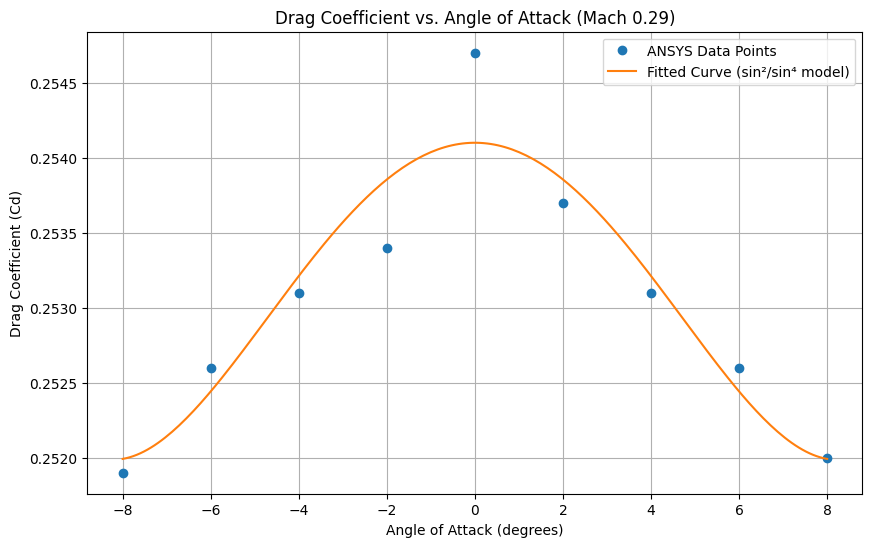

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data set
alpha_deg = np.array([-8,-6,-4,-2,0,2,4,6,8])
cd = np.array([0.2519,0.2526,0.2531,0.2534,0.2547,0.2537,0.2531,0.2526,0.2520])

# Convert to radians
alpha_rad = np.deg2rad(alpha_deg)

# Features for sin² and sin⁴
X = np.column_stack([np.sin(alpha_rad)**2, np.sin(alpha_rad)**4])

# Fit regression model
lr = LinearRegression().fit(X, cd)
cd_fit = lr.predict(X)

# Extract coefficients
Cd0 = lr.intercept_
Cd2, Cd4 = lr.coef_

# Print coefficients
print("Aerodynamic Coefficients (sin²/sin⁴ model):")
print(f"Cd0 (zero-lift drag) = {Cd0:.6f}")
print(f"Cd2 (quadratic term) = {Cd2:.6f}")
print(f"Cd4 (quartic term) = {Cd4:.6f}")

# Smooth curve for plotting
alpha_deg_smooth = np.linspace(-8, 8, 200)
alpha_rad_smooth = np.deg2rad(alpha_deg_smooth)
X_smooth = np.column_stack([np.sin(alpha_rad_smooth)**2, np.sin(alpha_rad_smooth)**4])
cd_smooth = lr.predict(X_smooth)

# Plot
plt.figure(figsize=(10,6))
plt.plot(alpha_deg, cd, 'o', label='ANSYS Data Points')
plt.plot(alpha_deg_smooth, cd_smooth, '-', label='Fitted Curve (sin²/sin⁴ model)')
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Drag Coefficient (Cd)")
plt.title("Drag Coefficient vs. Angle of Attack (Mach 0.29)")
plt.grid(True)
plt.legend()
plt.show()


--- Calculated Aerodynamic Coefficients from Full Dataset ---
Cl1 (linear term): 1.063358
Cl3 (cubic term): 1.468906
Cl5 (quintic term): 30.599767

--- Even Coefficients (ideally ~0 for odd symmetry) ---
Coefficient for sin^4: 2.376238e+00
Coefficient for sin^2: -1.387502e-01
Constant offset: 5.980597e-03
---------------------------------------------------------


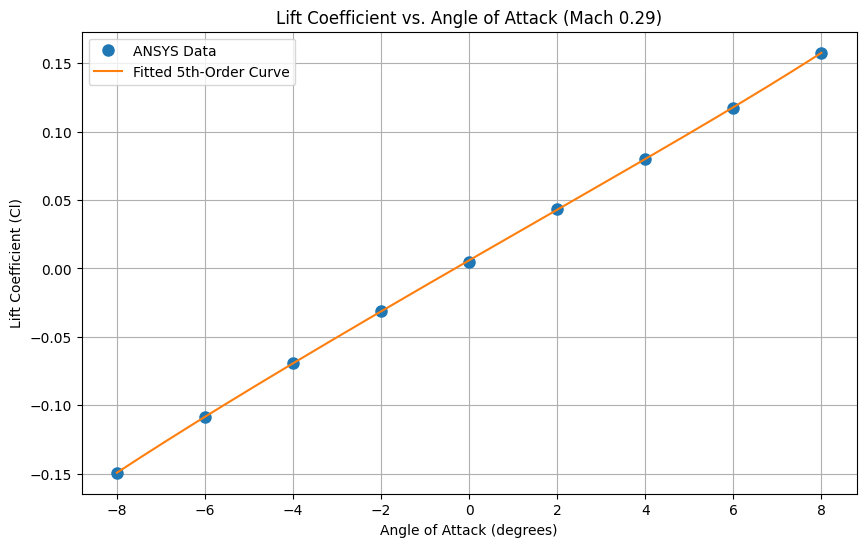

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ANSYS dataset (Cl vs AoA)
alpha_deg = np.array([-8,-6,-4,-2,0,2,4,6,8])
cl = np.array([-0.1493,-0.1087,-0.0692,-0.0309,0.0051,0.0434,0.0803,0.1177,0.1578])

# Convert angles to radians
alpha_rad = np.deg2rad(alpha_deg)
x_fit = np.sin(alpha_rad) # fitting in terms of sin(alpha)

# Perform 5th-order polynomial fit
coeffs = np.polyfit(x_fit, cl, 5)
C_l5, B, C_l3, D, C_l1, F = coeffs

# Print results
print("--- Calculated Aerodynamic Coefficients from Full Dataset ---")
print(f"Cl1 (linear term): {C_l1:.6f}")
print(f"Cl3 (cubic term): {C_l3:.6f}")
print(f"Cl5 (quintic term): {C_l5:.6f}")
print("\n--- Even Coefficients (ideally ~0 for odd symmetry) ---")
print(f"Coefficient for sin^4: {B:.6e}")
print(f"Coefficient for sin^2: {D:.6e}")
print(f"Constant offset: {F:.6e}")
print("---------------------------------------------------------")

# Smooth fit curve
alpha_deg_smooth = np.linspace(min(alpha_deg), max(alpha_deg), 200)
alpha_rad_smooth = np.deg2rad(alpha_deg_smooth)
cl_fit_smooth = np.polyval(coeffs, np.sin(alpha_rad_smooth)) # FIXED

# Plot
plt.figure(figsize=(10, 6))
plt.plot(alpha_deg, cl, 'o', markersize=8, label='ANSYS Data')
plt.plot(alpha_deg_smooth, cl_fit_smooth, '-', label='Fitted 5th-Order Curve')
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Lift Coefficient (Cl)")
plt.title("Lift Coefficient vs. Angle of Attack (Mach 0.29)")
plt.grid(True)
plt.legend()
plt.show()


Cm1 (linear/odd term): -0.416331
Cm3 (cubic/odd term): -0.667326


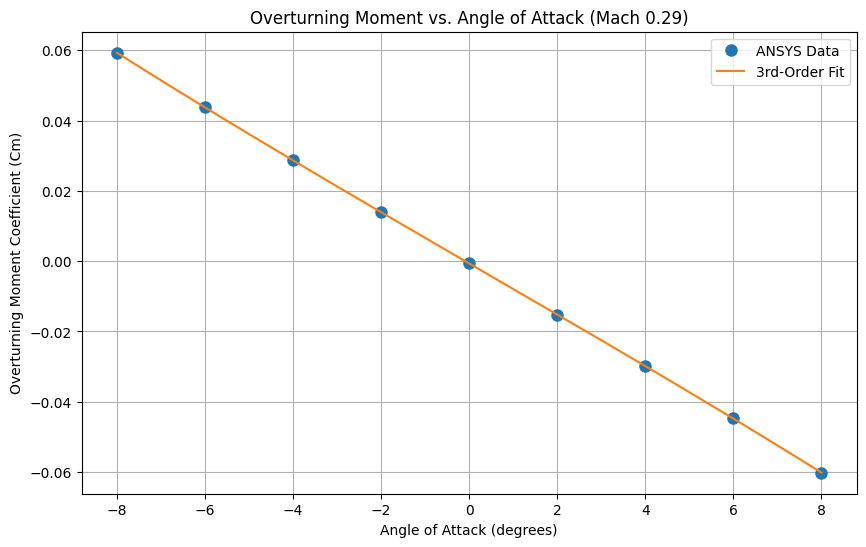

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Input your FULL SYMMETRIC ANSYS dataset
alpha_deg = np.array([-8,-6,-4,-2,0,2,4,6,8])
cm = np.array([0.0593,0.0438,0.0287,0.0139,-0.0006,-0.0152,-0.0299,-0.0447,-0.0602])

# Convert angles to radians
alpha_rad = np.deg2rad(alpha_deg)
x_fit = np.sin(alpha_rad)

# Perform 3rd-order polynomial fit
coeffs = np.polyfit(x_fit, cm, 3)
C_m3, _, C_m1, _ = coeffs # Only keep Cm3 and Cm1

# Print Cm1 and Cm3
print(f"Cm1 (linear/odd term): {C_m1:.6f}")
print(f"Cm3 (cubic/odd term): {C_m3:.6f}")

# Smooth curve for plotting
alpha_deg_smooth = np.linspace(min(alpha_deg), max(alpha_deg), 300)
alpha_rad_smooth = np.deg2rad(alpha_deg_smooth)
cm_fit_smooth = np.polyval(coeffs, np.sin(alpha_rad_smooth))

# Plot
plt.figure(figsize=(10,6))
plt.plot(alpha_deg, cm, 'o', markersize=8, label='ANSYS Data')
plt.plot(alpha_deg_smooth, cm_fit_smooth, '-', label='3rd-Order Fit')
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Overturning Moment Coefficient (Cm)")
plt.title("Overturning Moment vs. Angle of Attack (Mach 0.29)")
plt.grid(True)
plt.legend()
plt.show()


mach 0.25

Aerodynamic Coefficients (sin²/sin⁴ model):
Cd0 (zero-lift drag) = 0.266329
Cd2 (quadratic term) = -0.120405
Cd4 (quartic term) = -2.693871


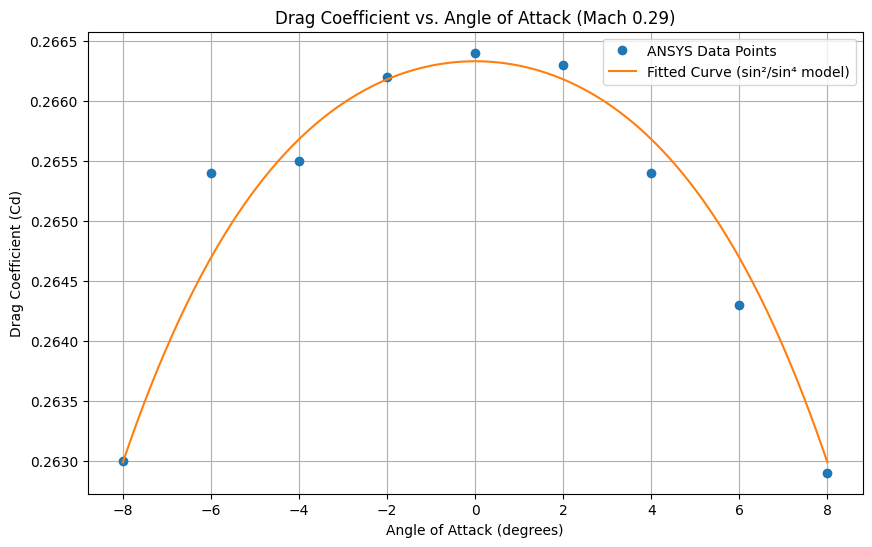

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data set
alpha_deg = np.array([-8,-6,-4,-2,0,2,4,6,8])
cd = np.array([0.2630,0.2654,0.2655,0.2662,0.2664,0.2663,0.2654,0.2643,0.2629])

# Convert to radians
alpha_rad = np.deg2rad(alpha_deg)

# Features for sin² and sin⁴
X = np.column_stack([np.sin(alpha_rad)**2, np.sin(alpha_rad)**4])

# Fit regression model
lr = LinearRegression().fit(X, cd)
cd_fit = lr.predict(X)

# Extract coefficients
Cd0 = lr.intercept_
Cd2, Cd4 = lr.coef_

# Print coefficients
print("Aerodynamic Coefficients (sin²/sin⁴ model):")
print(f"Cd0 (zero-lift drag) = {Cd0:.6f}")
print(f"Cd2 (quadratic term) = {Cd2:.6f}")
print(f"Cd4 (quartic term) = {Cd4:.6f}")

# Smooth curve for plotting
alpha_deg_smooth = np.linspace(-8, 8, 200)
alpha_rad_smooth = np.deg2rad(alpha_deg_smooth)
X_smooth = np.column_stack([np.sin(alpha_rad_smooth)**2, np.sin(alpha_rad_smooth)**4])
cd_smooth = lr.predict(X_smooth)

# Plot
plt.figure(figsize=(10,6))
plt.plot(alpha_deg, cd, 'o', label='ANSYS Data Points')
plt.plot(alpha_deg_smooth, cd_smooth, '-', label='Fitted Curve (sin²/sin⁴ model)')
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Drag Coefficient (Cd)")
plt.title("Drag Coefficient vs. Angle of Attack (Mach 0.29)")
plt.grid(True)
plt.legend()
plt.show()


--- Calculated Aerodynamic Coefficients from Full Dataset ---
Cl1 (linear term): 1.457771
Cl3 (cubic term): -70.624598
Cl5 (quintic term): 3227.132965

--- Even Coefficients (ideally ~0 for odd symmetry) ---
Coefficient for sin^4: -1.854413e+02
Coefficient for sin^2: 3.874831e+00
Constant offset: -8.632568e-05
---------------------------------------------------------


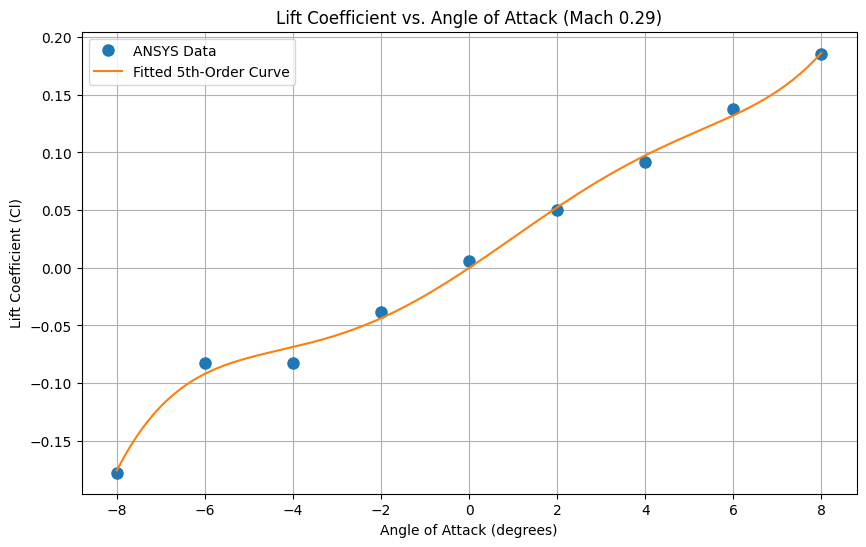

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ANSYS dataset (Cl vs AoA)
alpha_deg = np.array([-8,-6,-4,-2,0,2,4,6,8])
cl = np.array([-0.1776,-0.0828,-0.0828,-0.0381,0.0058,0.0497,0.0916,0.1376,0.1850])

# Convert angles to radians
alpha_rad = np.deg2rad(alpha_deg)
x_fit = np.sin(alpha_rad) # fitting in terms of sin(alpha)

# Perform 5th-order polynomial fit
coeffs = np.polyfit(x_fit, cl, 5)
C_l5, B, C_l3, D, C_l1, F = coeffs

# Print results
print("--- Calculated Aerodynamic Coefficients from Full Dataset ---")
print(f"Cl1 (linear term): {C_l1:.6f}")
print(f"Cl3 (cubic term): {C_l3:.6f}")
print(f"Cl5 (quintic term): {C_l5:.6f}")
print("\n--- Even Coefficients (ideally ~0 for odd symmetry) ---")
print(f"Coefficient for sin^4: {B:.6e}")
print(f"Coefficient for sin^2: {D:.6e}")
print(f"Constant offset: {F:.6e}")
print("---------------------------------------------------------")

# Smooth fit curve
alpha_deg_smooth = np.linspace(min(alpha_deg), max(alpha_deg), 200)
alpha_rad_smooth = np.deg2rad(alpha_deg_smooth)
cl_fit_smooth = np.polyval(coeffs, np.sin(alpha_rad_smooth)) # FIXED

# Plot
plt.figure(figsize=(10, 6))
plt.plot(alpha_deg, cl, 'o', markersize=8, label='ANSYS Data')
plt.plot(alpha_deg_smooth, cl_fit_smooth, '-', label='Fitted 5th-Order Curve')
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Lift Coefficient (Cl)")
plt.title("Lift Coefficient vs. Angle of Attack (Mach 0.29)")
plt.grid(True)
plt.legend()
plt.show()


Cm1 (linear/odd term): -0.421251
Cm3 (cubic/odd term): -3.370503


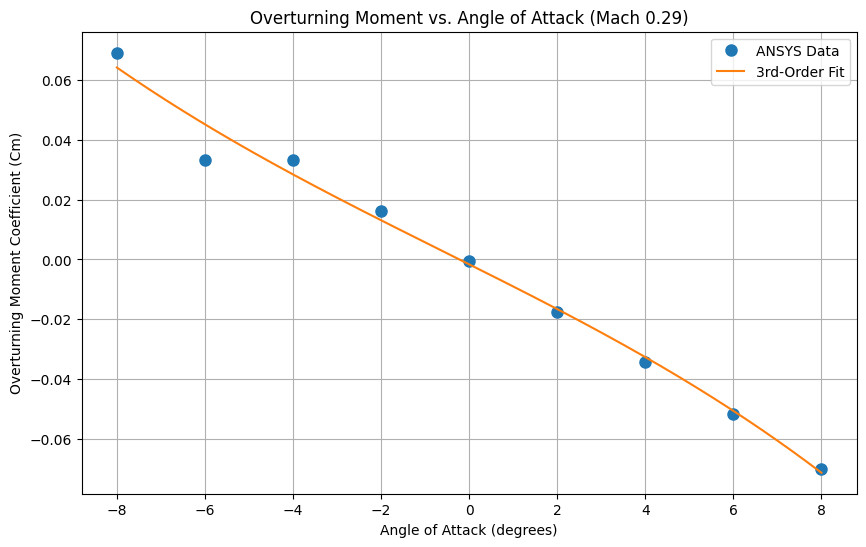

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Input your FULL SYMMETRIC ANSYS dataset
alpha_deg = np.array([-8,-6,-4,-2,0,2,4,6,8])
cm = np.array([0.0691,0.0334,0.0334,0.0163,-0.0006,-0.0175,-0.0343,-0.0518,-0.0699])

# Convert angles to radians
alpha_rad = np.deg2rad(alpha_deg)
x_fit = np.sin(alpha_rad)

# Perform 3rd-order polynomial fit
coeffs = np.polyfit(x_fit, cm, 3)
C_m3, _, C_m1, _ = coeffs # Only keep Cm3 and Cm1

# Print Cm1 and Cm3
print(f"Cm1 (linear/odd term): {C_m1:.6f}")
print(f"Cm3 (cubic/odd term): {C_m3:.6f}")

# Smooth curve for plotting
alpha_deg_smooth = np.linspace(min(alpha_deg), max(alpha_deg), 300)
alpha_rad_smooth = np.deg2rad(alpha_deg_smooth)
cm_fit_smooth = np.polyval(coeffs, np.sin(alpha_rad_smooth))

# Plot
plt.figure(figsize=(10,6))
plt.plot(alpha_deg, cm, 'o', markersize=8, label='ANSYS Data')
plt.plot(alpha_deg_smooth, cm_fit_smooth, '-', label='3rd-Order Fit')
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Overturning Moment Coefficient (Cm)")
plt.title("Overturning Moment vs. Angle of Attack (Mach 0.29)")
plt.grid(True)
plt.legend()
plt.show()
